In [1]:
# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style
from sklearn.metrics import confusion_matrix

# Algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

In [2]:
#read the CSV file
df=pd.read_csv("email.csv")

In [3]:
#Print top 5 Values
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5573 entries, 0 to 5572
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5573 non-null   object
 1   Message   5573 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df['spam']=df['Category'].apply(lambda x: 1 if x=='spam' else 0)
df.head()

,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [6]:
X=df['Message']
Y=df['spam']

In [7]:
#split train and test data
X_train, X_test, y_train, y_test = train_test_split(X,Y)

In [8]:
#Defineing Naive Baised
clf_NaiveBaised= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nd', MultinomialNB())
])

In [9]:
#Fiting the algorithm
clf_NaiveBaised.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nd', MultinomialNB())])

In [10]:
#Make prediction on X_test
y_pred_NB=clf_NaiveBaised.predict(X_test)

In [11]:
conf_mat_NB=confusion_matrix(y_test, y_pred_NB)

<Axes: >

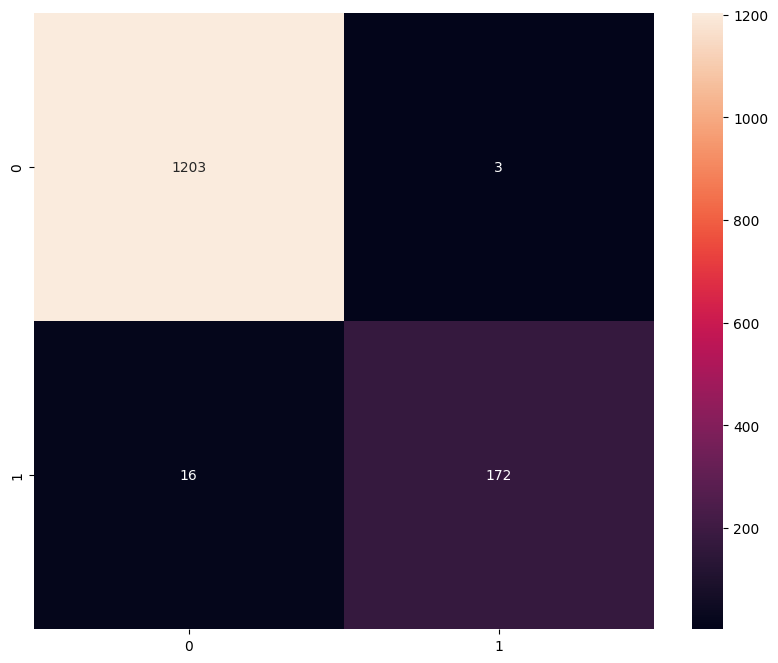

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_NB,annot=True,fmt='d')

In [13]:
naive_acc=accuracy_score(y_test,y_pred_NB)
naive_acc

0.9863701578192252

In [14]:
clf_svm= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('svc', SVC(kernel="rbf",C=1000,gamma=0.001))
])

In [15]:
clf_svm.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('svc', SVC(C=1000, gamma=0.001))])

In [16]:
y_pred_SVM=clf_svm.predict(X_test)

In [17]:
conf_mat_SVM=confusion_matrix(y_test, y_pred_SVM)

<Axes: >

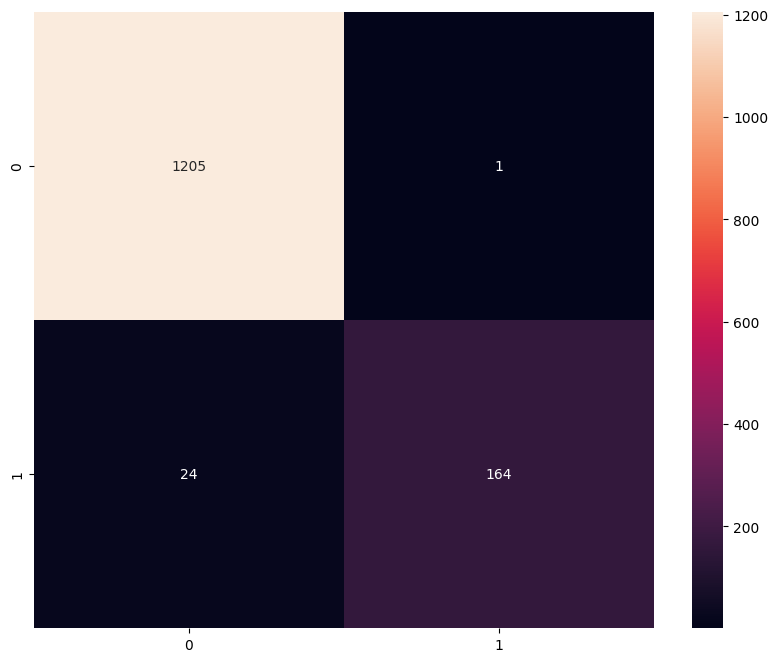

In [18]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_SVM,annot=True,fmt='d')

In [19]:
svm_acc=accuracy_score(y_test,y_pred_SVM)
svm_acc

0.9820659971305595

In [20]:
clf_knn= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('knn', KNeighborsClassifier(n_neighbors=3))
])

In [21]:
clf_knn.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('knn', KNeighborsClassifier(n_neighbors=3))])

In [22]:
y_pred_KNN=clf_knn.predict(X_test)

In [23]:
conf_mat_KNN=confusion_matrix(y_test, y_pred_KNN)

<Axes: >

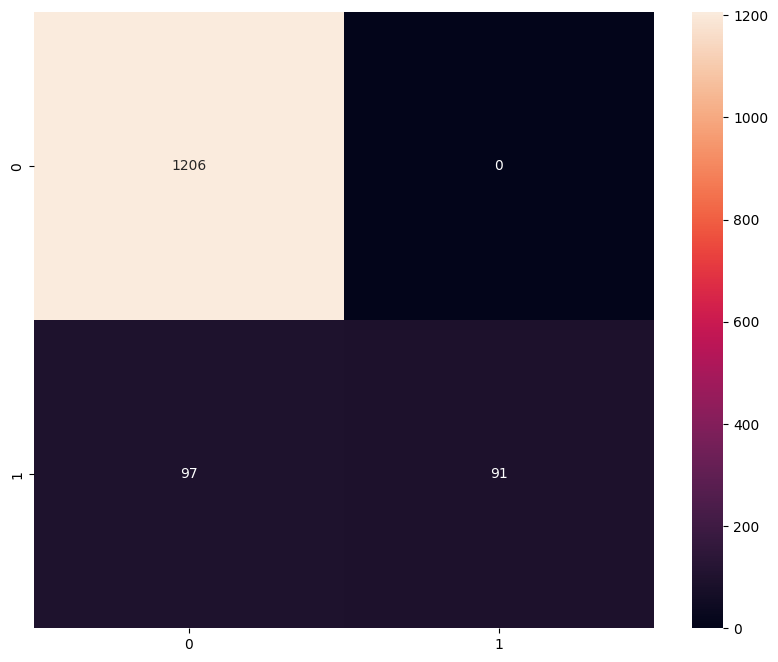

In [24]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_KNN,annot=True,fmt='d')

In [25]:
knn_acc=accuracy_score(y_test,y_pred_KNN)
knn_acc

0.930416068866571

In [26]:
clf_DecisionTree= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('dt',DecisionTreeClassifier())
])

In [27]:
clf_DecisionTree.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('dt', DecisionTreeClassifier())])

In [28]:
y_pred_DT=clf_DecisionTree.predict(X_test)

In [29]:
conf_mat_DT=confusion_matrix(y_test, y_pred_DT)

<Axes: >

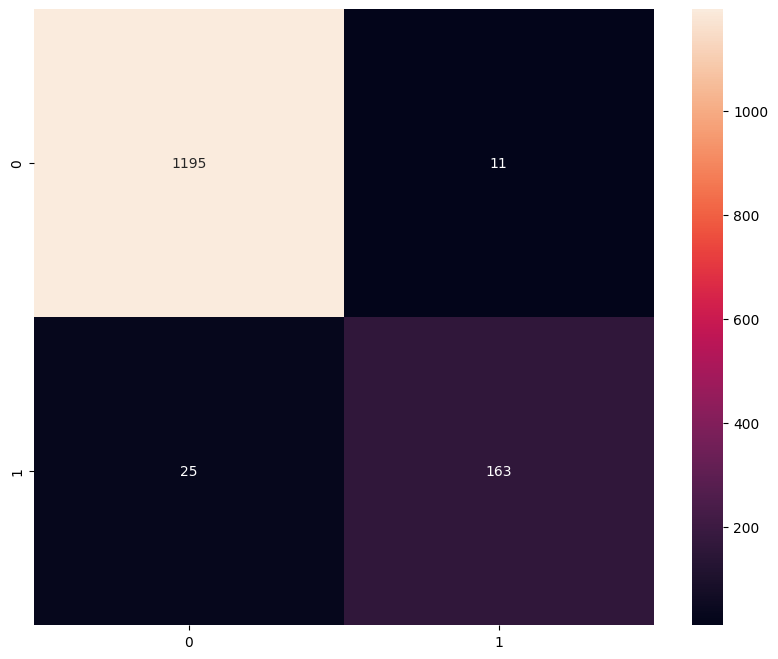

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_DT,annot=True,fmt='d')

In [31]:
dt_acc=accuracy_score(y_test,y_pred_DT)
dt_acc

0.9741750358680057

In [32]:
clf_rf= Pipeline([
    ('vectorizer', CountVectorizer()),
    ('rf', RandomForestClassifier(n_estimators=100))
])

In [33]:
clf_rf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()),
                ('rf', RandomForestClassifier())])

In [34]:
y_pred_RF=clf_rf.predict(X_test)

In [35]:
conf_mat_RF=confusion_matrix(y_test, y_pred_RF)

<Axes: >

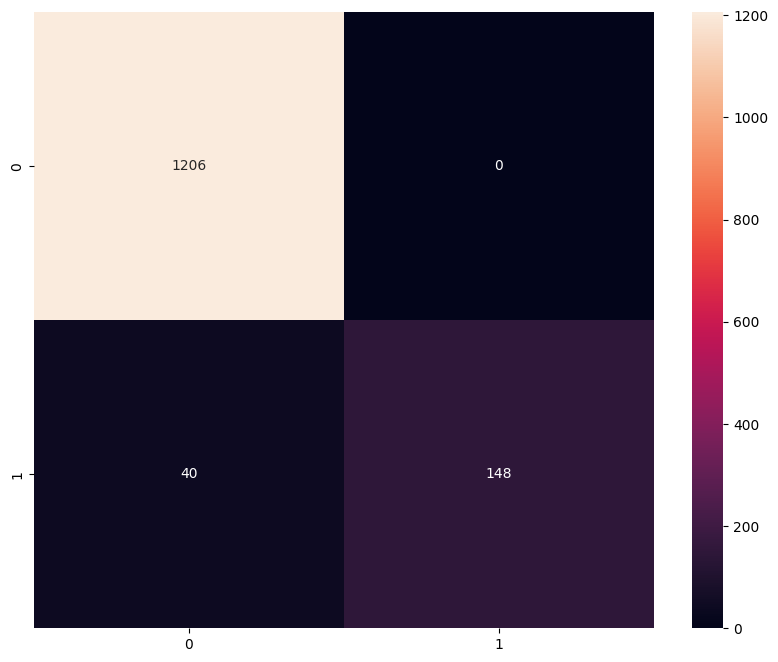

In [36]:
plt.figure(figsize=(10,8))
sns.heatmap(conf_mat_RF,annot=True,fmt='d')

In [37]:
rf_acc=accuracy_score(y_test,y_pred_RF)
rf_acc

0.9713055954088953

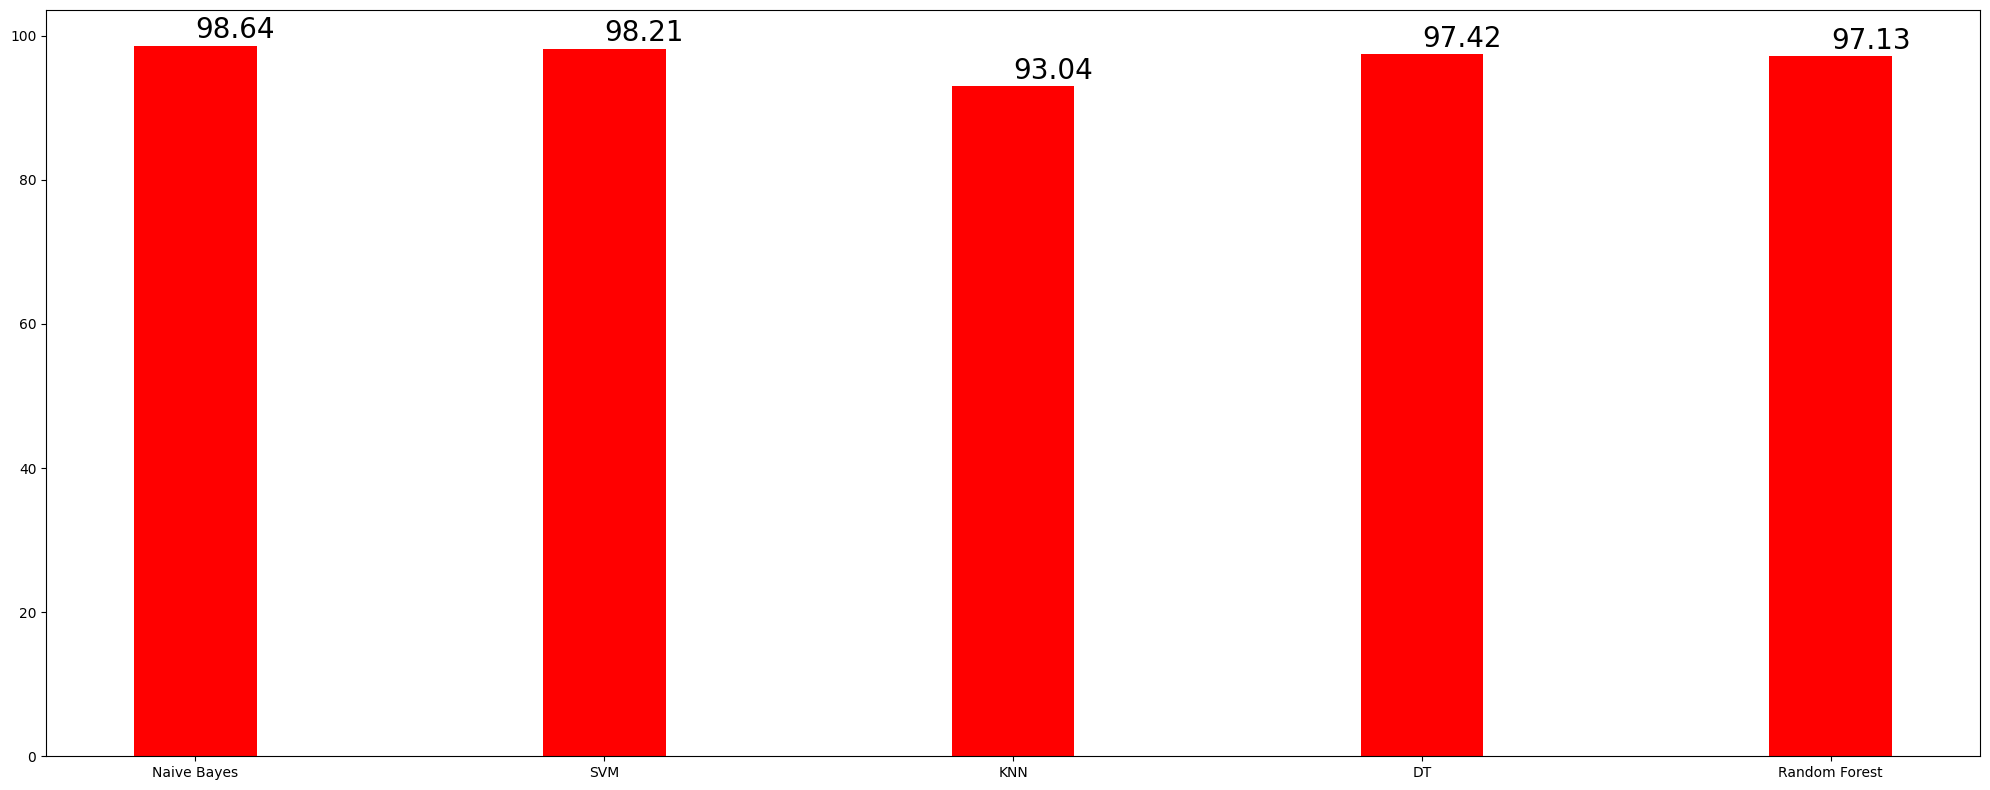

In [38]:
menMeans = np.array([naive_acc,svm_acc,knn_acc,dt_acc,rf_acc])*100
ind = ['Naive Bayes','SVM','KNN','DT','Random Forest']
fig, ax = plt.subplots(figsize = (20,8))
ax.bar(ind,menMeans,width=0.3,color ='red')
for index,data in enumerate(menMeans):
    plt.text(x=index , y =data+1 , s="{:.2f}".format(data) , fontdict=dict(fontsize=20))
plt.tight_layout()
plt.show()